In [75]:
from tqdm.notebook import tqdm
import pickle
from collections import defaultdict
import numpy as np
from numpy import log, log1p, exp, sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

ANN_FACTOR = 52

In [76]:
with open('./data/stocks.pkl', 'rb') as f:
    stocks = pickle.load(f)

with open('./data/market.pkl', 'rb') as f:
    market = pickle.load(f)

## Data Structure and Integrity Check

In [77]:
# Checking for missing values and data types in stocks DataFrame
print(stocks.info())
print(stocks.isnull().sum())

# Checking for missing values and data types in market DataFrame
print(market.info())
print(market.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 506634 entries, 0 to 511225
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   permno  506634 non-null  int64         
 1   date    506634 non-null  datetime64[ns]
 2   start   506634 non-null  datetime64[ns]
 3   ending  506634 non-null  datetime64[ns]
 4   ticker  506634 non-null  object        
 5   ret     506634 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 27.1+ MB
None
permno    0
date      0
start     0
ending    0
ticker    0
ret       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 1962-07-08 to 2023-12-31
Freq: W-SUN
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vwretd  3209 non-null   float64
 1   ewretd  3209 non-null   float64
 2   sprtrn  3209 non-null   float64
dtypes: float64(3)
memory usage: 100.3 KB


## Discriptive Statistics

In [78]:
# Descriptive Statistics
print(stocks.describe())
print(market.describe())


              permno                           date  \
count  506634.000000                         506634   
mean    53989.981705  2013-04-25 14:50:46.904866304   
min     10078.000000            2003-01-05 00:00:00   
25%     24205.000000            2008-01-20 00:00:00   
50%     58246.000000            2013-03-03 00:00:00   
75%     81126.000000            2018-07-22 00:00:00   
max     93436.000000            2023-12-31 00:00:00   
std     28170.647419                            NaN   

                               start                         ending  \
count                         506634                         506634   
mean   1991-10-27 20:14:39.801987584  2021-03-28 06:27:15.879155456   
min              1925-12-31 00:00:00            2003-02-21 00:00:00   
25%              1982-04-08 00:00:00            2019-11-20 00:00:00   
50%              1998-04-29 00:00:00            2023-12-29 00:00:00   
75%              2006-08-11 00:00:00            2023-12-29 00:00:00   
max    

## Univariate Analysis

In [79]:
# Display the first few rows of each dataframe
stocks_head = stocks.head()
market_head = market.head()

stocks_head, market_head

(   permno       date      start     ending ticker       ret
 0   10078 2003-01-05 1992-08-20 2010-01-28   SUNW  0.392100
 1   10078 2003-01-12 1992-08-20 2010-01-28   SUNW  0.061972
 2   10078 2003-01-19 1992-08-20 2010-01-28   SUNW -0.005040
 3   10078 2003-01-26 1992-08-20 2010-01-28   SUNW -0.097973
 4   10078 2003-02-02 1992-08-20 2010-01-28   SUNW -0.105386,
               vwretd    ewretd    sprtrn
 caldt                                   
 1962-07-08  0.008674  0.012914  0.009266
 1962-07-15  0.029710  0.036307  0.029554
 1962-07-22 -0.017051 -0.019544 -0.017638
 1962-07-29  0.007069  0.001481  0.006865
 1962-08-05  0.016668  0.012487  0.016085)

In [80]:
print(stocks.info())
print(stocks.head())

market.info()
market.head()

<class 'pandas.core.frame.DataFrame'>
Index: 506634 entries, 0 to 511225
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   permno  506634 non-null  int64         
 1   date    506634 non-null  datetime64[ns]
 2   start   506634 non-null  datetime64[ns]
 3   ending  506634 non-null  datetime64[ns]
 4   ticker  506634 non-null  object        
 5   ret     506634 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 27.1+ MB
None
   permno       date      start     ending ticker       ret
0   10078 2003-01-05 1992-08-20 2010-01-28   SUNW  0.392100
1   10078 2003-01-12 1992-08-20 2010-01-28   SUNW  0.061972
2   10078 2003-01-19 1992-08-20 2010-01-28   SUNW -0.005040
3   10078 2003-01-26 1992-08-20 2010-01-28   SUNW -0.097973
4   10078 2003-02-02 1992-08-20 2010-01-28   SUNW -0.105386
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 1962-07-08 to 2023-12

,vwretd,ewretd,sprtrn
caldt,,,
1962-07-08,0.008674,0.012914,0.009266
1962-07-15,0.029710,0.036307,0.029554
1962-07-22,-0.017051,-0.019544,-0.017638
1962-07-29,0.007069,0.001481,0.006865
1962-08-05,0.016668,0.012487,0.016085


In [81]:
print(stocks.isnull().sum())

print(market.isnull().sum())

permno    0
date      0
start     0
ending    0
ticker    0
ret       0
dtype: int64
vwretd    0
ewretd    0
sprtrn    0
dtype: int64


## Visualize distributions of numeric variables

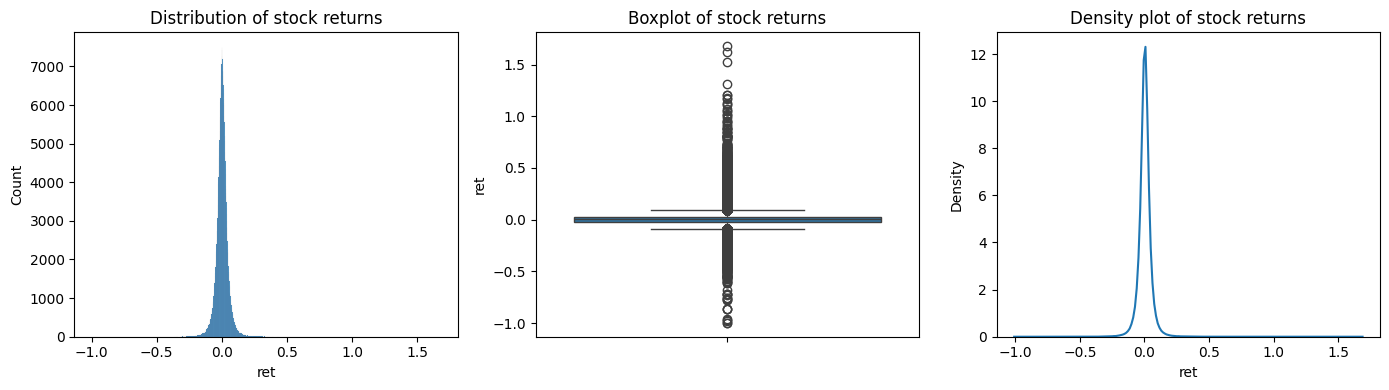

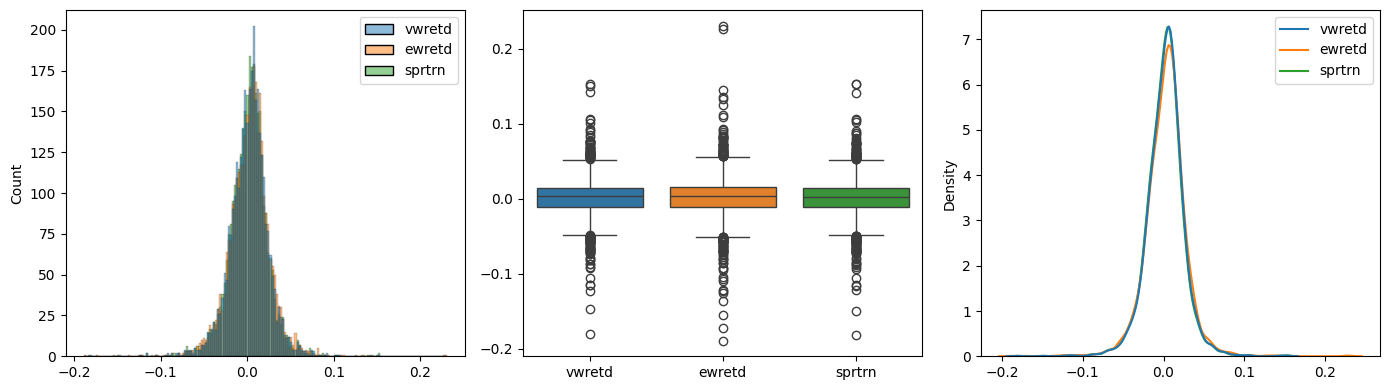

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(stocks.ret, ax=ax[0])
ax[0].set_title('Distribution of stock returns')

sns.boxplot(y=stocks.ret, ax=ax[1])
ax[1].set_title('Boxplot of stock returns')

sns.kdeplot(stocks.ret, ax=ax[2])
ax[2].set_title('Density plot of stock returns')

plt.tight_layout()
plt.show()

# Repeat for market returns
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(market[['vwretd', 'ewretd', 'sprtrn']], ax=ax[0])
sns.boxplot(data=market[['vwretd', 'ewretd', 'sprtrn']], ax=ax[1])
sns.kdeplot(data=market[['vwretd', 'ewretd', 'sprtrn']], ax=ax[2])
plt.tight_layout()
plt.show()

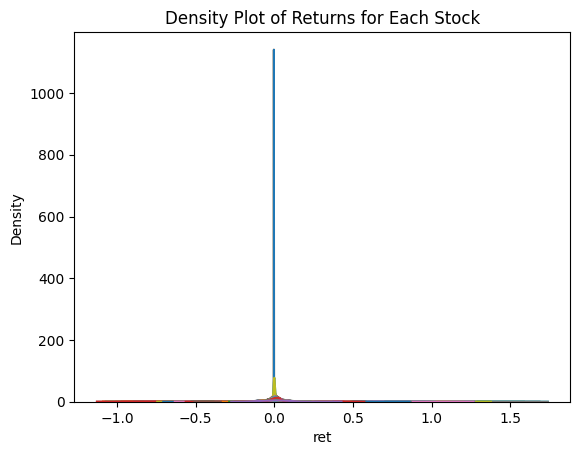

Tickers with warnings single value warnings: ['FBIN', 'FTRE', 'TFCFA', 'TFCF', 'IILG']


In [83]:
warning_tickers = []

for ticker in stocks['ticker'].unique():
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")
        sns.kdeplot(stocks[stocks['ticker'] == ticker]['ret'], label=ticker)
        if len(w) > 0 and issubclass(w[-1].category, UserWarning):
            warning_tickers.append(ticker)

# Remove the warning tickers from the plot
for ticker in stocks['ticker'].unique():
    if ticker not in warning_tickers:
        sns.kdeplot(stocks[stocks['ticker'] == ticker]['ret'], label=ticker)

plt.title('Density Plot of Returns for Each Stock')
plt.show()

# Print the tickers causing the warnings
print("Tickers with warnings single value warnings:", warning_tickers)

We notice a very large abnormal density for some stocks this is due to their low variance only being included in the data for very short periodsof time. As we only include those stocks that apear in the data for at least two years we are not concerned with these abnromal socks

In [84]:
mode_returns = stocks.groupby('ticker')['ret'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


top_modes = mode_returns.sort_values(ascending=False).head(5)

# Print out top 5 tickers with their mode values
print("Top 5 tickers with highest mode returns:")
print(top_modes)

# Step 3: Inspect the specific return values for each of these top 5 tickers
for ticker in top_modes.index:
    print(f"\nTicker: {ticker}")
    print(stocks[stocks['ticker'] == ticker])

Top 5 tickers with highest mode returns:
ticker
IILG    0.192232
FBIN    0.073503
FTRE    0.021904
BLDR   -0.002243
RATL   -0.002417
Name: ret, dtype: float64

Ticker: IILG
        permno       date      start     ending ticker       ret
507916   92772 2016-05-15 2016-05-13 2016-05-13   IILG  0.192232

Ticker: FBIN
       permno       date      start     ending ticker       ret
36403   12981 2022-12-18 2016-06-24 2022-12-16   FBIN  0.073503

Ticker: FTRE
        permno       date      start     ending ticker       ret
124826   23942 2023-07-09 2023-07-03 2023-07-05   FTRE  0.021904

Ticker: BLDR
        permno       date      start     ending ticker       ret
485340   90720 2023-12-24 2023-12-18 2023-12-29   BLDR  0.029106
485341   90720 2023-12-31 2023-12-18 2023-12-29   BLDR -0.002243

Ticker: RATL
        permno       date      start     ending ticker           ret
380565   80515 2003-01-05 2002-02-01 2003-02-21   RATL  0.000000e+00
380566   80515 2003-01-12 2002-02-01 2003-02-21   

## Plot time series of returns

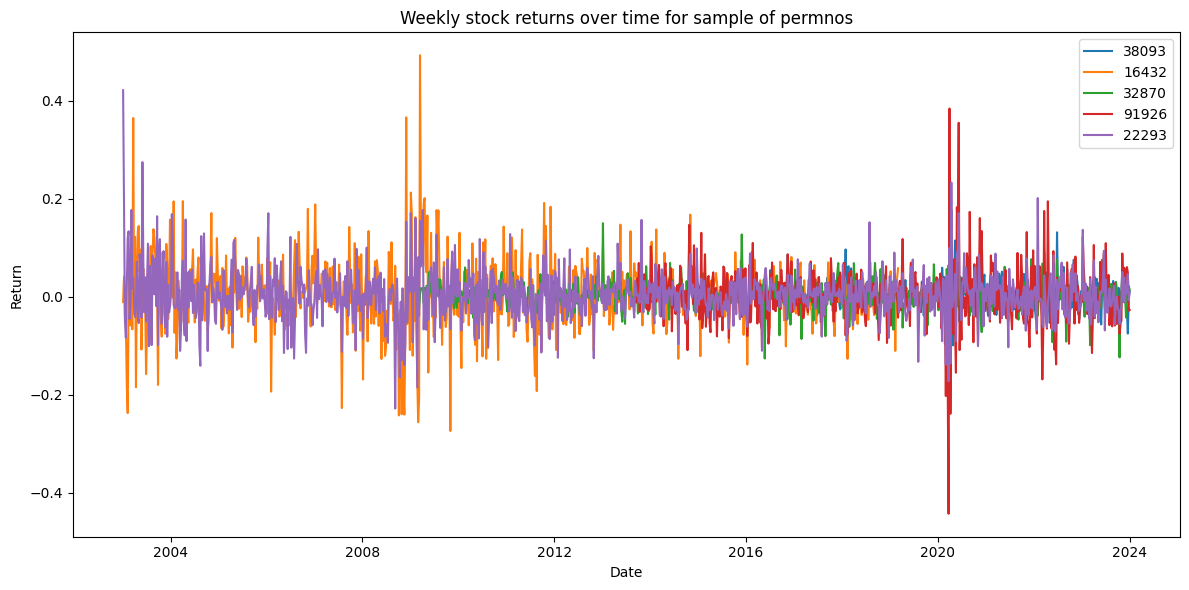

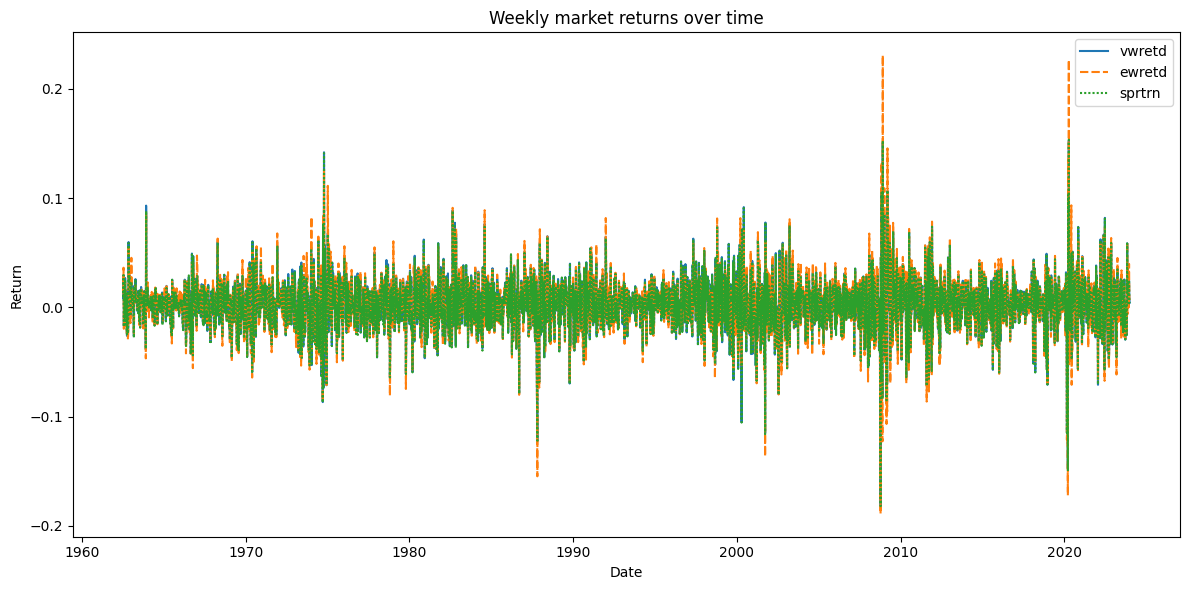

In [85]:
# Sample a few permnos to plot
permnos_to_plot = stocks.permno.sample(5).unique()

fig, ax = plt.subplots(figsize=(12, 6))
for permno in permnos_to_plot:
    df = stocks[stocks.permno==permno]
    sns.lineplot(x=df.date, y=df.ret, label=permno, ax=ax)
ax.set_title('Weekly stock returns over time for sample of permnos')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()

# Plot market returns
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=market[['vwretd', 'ewretd', 'sprtrn']], ax=ax)
ax.set_title('Weekly market returns over time')
ax.set_xlabel('Date')
ax.set_ylabel('Return')  
plt.legend()
plt.tight_layout()
plt.show()

## Cumulative portfolio returns

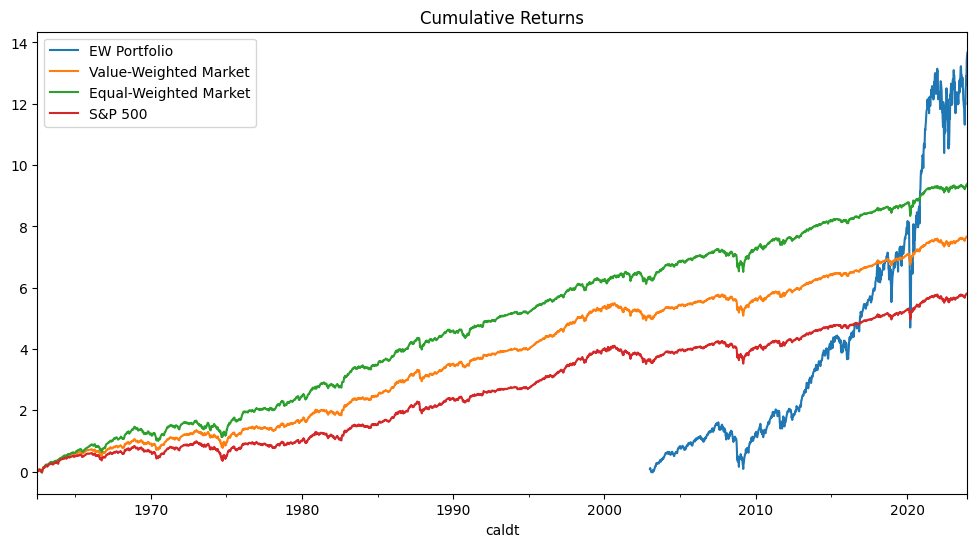

In [86]:
ew_portfolio = stocks.groupby('date').ret.mean()
ew_portfolio_cumulative = (1 + ew_portfolio).cumprod() - 1

df_cum = pd.DataFrame({
    'EW Portfolio': ew_portfolio_cumulative, 
    'Value-Weighted Market': market['vwretd'].cumsum(),
    'Equal-Weighted Market': market['ewretd'].cumsum(),
    'S&P 500': market['sprtrn'].cumsum()}, index=market.index)
    
df_cum.plot(figsize=(12, 6), title='Cumulative Returns')
plt.show()

## Group by stock characteristics

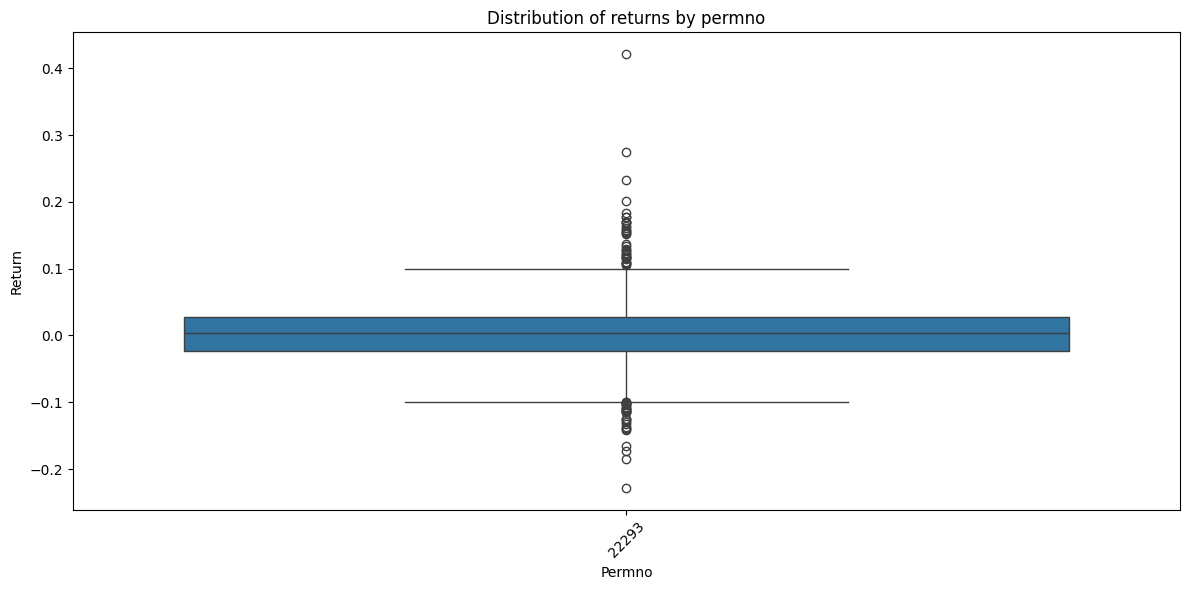

In [87]:
# Group by permno and plot distributions
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='permno', y='ret', data=df.reset_index(), ax=ax)
plt.xticks(rotation=45)
ax.set_title('Distribution of returns by permno')
ax.set_xlabel('Permno')
ax.set_ylabel('Return')
plt.tight_layout()
plt.show()

## Visualize relationships between stock and market returns

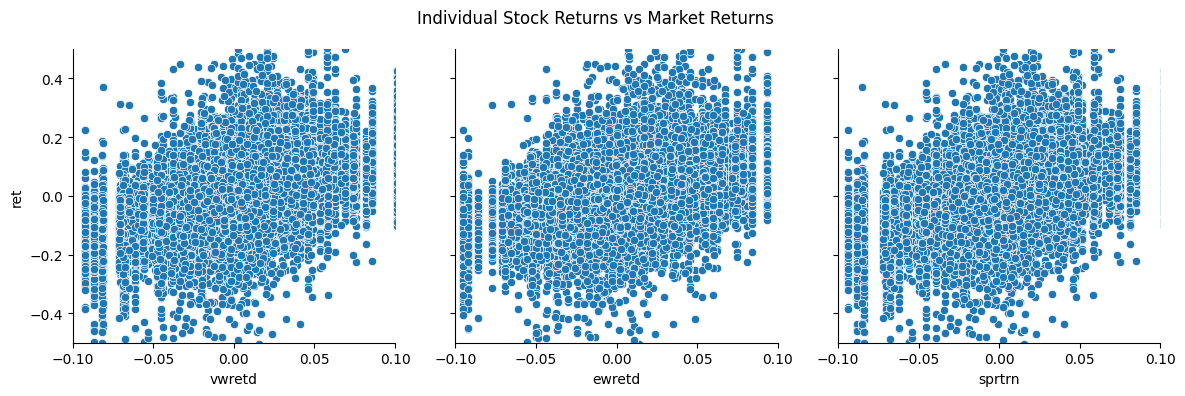

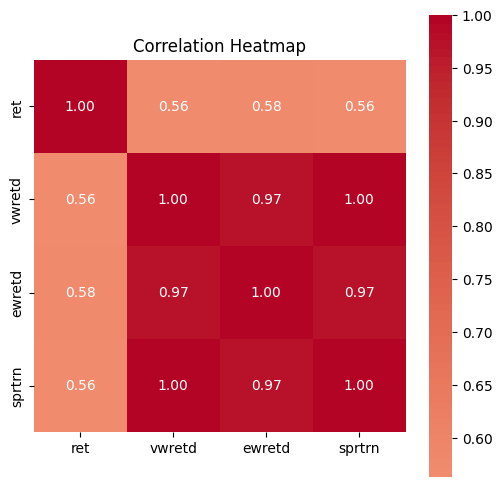

In [88]:
df = stocks.merge(market, left_on='date', right_index=True)

g = sns.PairGrid(df, x_vars=['vwretd', 'ewretd', 'sprtrn'], y_vars=["ret"], height=4)
g.map(sns.scatterplot)
g.set(xlim=(-0.1, 0.1), ylim=(-0.5, 0.5))  
g.fig.suptitle('Individual Stock Returns vs Market Returns')
plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
corr = df[['ret', 'vwretd', 'ewretd', 'sprtrn']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=ax, center=0)  
ax.set_title('Correlation Heatmap'); plt.show()

## Volitility Analysis

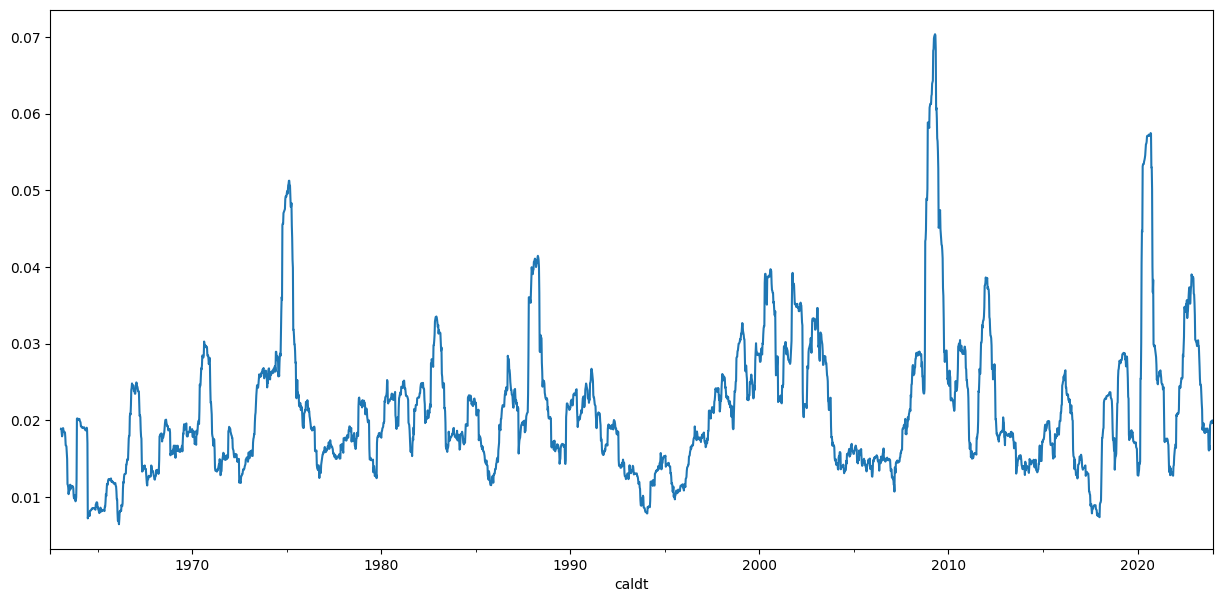

In [89]:
# Rolling standard deviation for market volatility
market['sprtrn'].rolling(window=30).std().plot(figsize=(15, 7))
plt.show()

# # Rolling standard deviation for a stock's volatility
# stocks.groupby('ticker')['ret'].rolling(window=30).std().unstack(level=0).plot(figsize=(15, 7))
# plt.show()